In [2]:
import statsmodels.api as sm
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import geopandas as gpd

# import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 1000

plt.style.use('seaborn-darkgrid')


from statsmodels.tsa.api import ARDL

In [3]:
input_dir = '../../data/final'

df_final = pd.read_csv(os.path.join(input_dir, 'df_merged_inner.csv'))

/var/folders/38/ttqg2y215g16g2ng7jd502_c0000gn/T/ipykernel_30139/2503433404.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv(os.path.join(input_dir, 'df_merged_inner.csv'))


In [4]:
df_final['wind_speed'] = np.sqrt(df_final['u10']**2 + df_final['v10']**2)
df_final[['wind_speed', 't2m', 'tp']].isnull().sum()

# df_final.to_csv(os.path.join(input_dir, 'df_final.csv'), index=False)

In [11]:
df_final.head()

,Unnamed: 0,datetime,Location name,ESMI_ID,District,State,Category,Connection Type,Lat,Lon,t2m,u10,v10,tp,date,time,station_id,pct_blackout,wind_speed
0,0,2014-11-17 17:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,295.09723,-1.271197,-0.320305,5.645638e-04,20141117,1700,495,0.0,1.310930
1,1,2014-11-29 17:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,293.04870,-1.548639,-1.584031,0.000000e+00,20141129,1700,495,0.0,2.215274
2,2,2014-11-30 22:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,289.83447,-1.289795,-1.528702,4.351137e-07,20141130,2200,495,0.0,2.000125
3,3,2014-11-13 07:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,297.14110,-3.871719,0.472760,6.666072e-04,20141113,700,495,0.0,3.900476
4,4,2014-12-31 15:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,296.46838,-2.901352,0.717420,2.732359e-06,20141231,1500,495,0.0,2.988735


In [12]:

geo_df = gpd.read_file('../../data/helper/STATION.geojson')


df_final_geo = pd.merge(df_final, geo_df, on='station_id', how='left')

df_final_geo.head()



,Unnamed: 0,datetime,Location name_x,ESMI_ID_x,District,State,Category_x,Connection Type_x,Lat_x,Lon_x,t2m,u10,v10,tp,date,time,station_id,pct_blackout,wind_speed,Location name_y,ESMI_ID_y,Category_y,Connection Type_y,Lat_y,Lon_y,climate_zone_DN,climate_zone_name,climate_zone_code,geometry
0,0,2014-11-17 17:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,295.09723,-1.271197,-0.320305,5.645638e-04,20141117,1700,495,0.0,1.310930,Vijay Nagar,NaN,State Capital,Domestic,17.394295,78.451016,3.0,"Tropical, savannah",Aw,POINT (78.45102 17.39429)
1,1,2014-11-29 17:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,293.04870,-1.548639,-1.584031,0.000000e+00,20141129,1700,495,0.0,2.215274,Vijay Nagar,NaN,State Capital,Domestic,17.394295,78.451016,3.0,"Tropical, savannah",Aw,POINT (78.45102 17.39429)
2,2,2014-11-30 22:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,289.83447,-1.289795,-1.528702,4.351137e-07,20141130,2200,495,0.0,2.000125,Vijay Nagar,NaN,State Capital,Domestic,17.394295,78.451016,3.0,"Tropical, savannah",Aw,POINT (78.45102 17.39429)
3,3,2014-11-13 07:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,297.14110,-3.871719,0.472760,6.666072e-04,20141113,700,495,0.0,3.900476,Vijay Nagar,NaN,State Capital,Domestic,17.394295,78.451016,3.0,"Tropical, savannah",Aw,POINT (78.45102 17.39429)
4,4,2014-12-31 15:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,296.46838,-2.901352,0.717420,2.732359e-06,20141231,1500,495,0.0,2.988735,Vijay Nagar,NaN,State Capital,Domestic,17.394295,78.451016,3.0,"Tropical, savannah",Aw,POINT (78.45102 17.39429)


In [17]:
# drop columns: Loctionname_y, ESMI_ID_y, Category_y, Lat_y, Lon_y, geometry_y
df_final_geo.drop(columns=['Location name_y', 'ESMI_ID_y',
                  'Category_y', 'Lat_y', 'Lon_y'], inplace=True)
# rename: Loctionname_x -> Loctionname, ESMI_ID_x -> ESMI_ID, Category_x -> Category, Lat_x -> Lat, Lon_x -> Lon
df_final_geo.rename(columns={'Loction name_x': 'Loctionname', 'ESMI_ID_x': 'ESMI_ID', 'Category_x': 'Category', 'Lat_x': 'Lat', 'Lon_x': 'Lon'}, inplace=True)

df_final_geo.to_csv(os.path.join(input_dir, 'df_final_geo.csv'), index=False)

In [ ]:
from statsmodels.tsa.ardl import ardl_select_order
import matplotlib.pyplot as plt

# Get unique climate zones
climate_zones = climate_groups['climate_zone_code'].unique()

# Dictionary to store ARDL models and summaries for each climate zone
climate_zone_models = {}

# Loop through each climate zone
for zone in climate_zones:
    # Filter the data for the current climate zone
    climate_zone_data = climate_groups[climate_groups['climate_zone_code'] == zone]

    # Select the optimal ARDL model based on AIC for this climate zone
    selected_model = ardl_select_order(climate_zone_data['pct_blackout'],
                                       exog=climate_zone_data[[
                                           't2m', 'wind', 'tp']],
                                       maxlag=4, ic='aic')

    # Fit the ARDL model with the selected lags
    model = selected_model.model.fit()

    # Store the model summary for later use
    climate_zone_models[zone] = model

    # Print out or log the summary for this climate zone
    print(f"\nClimate Zone: {zone}")
    print(model.summary())

In [5]:

# drop the rows where exog is n/a
df_final_notna = df_final.copy().dropna(subset=['wind_speed', 't2m', 'tp'])

model = ARDL(df_final_notna[['pct_blackout']],
             exog=df_final_notna[['wind_speed', 't2m', 'tp']], lags=1)

model_fit = model.fit()

# print the summary
print(model_fit.summary())

# save the summary
with open(os.path.join(input_dir, 'model_summary.txt'), 'w') as f:
    f.write(model_fit.summary().as_text())

/Users/rainylty/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                              ARDL Model Results                              
Dep. Variable:           pct_blackout   No. Observations:              7110681
Model:               ARDL(1, 0, 0, 0)   Log Likelihood             -668057.116
Method:               Conditional MLE   S.D. of innovations              0.266
Date:                Thu, 17 Oct 2024   AIC                        1336126.232
Time:                        16:10:03   BIC                        1336208.895
Sample:                             1   HQIC                       1336147.335
                              7110681                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6713      0.005   -139.258      0.000      -0.681      -0.662
pct_blackout.L1     0.2748      0.000    763.077      0.000       0.274       0.275
wind_speed.L0      -0.0005   7.8

In [18]:
with open(os.path.join(input_dir, 'model_summary.txt'), 'w') as f:
    f.write(model_fit.summary().as_text())

## Interpretation

- Precipitation (tp.L0) is the most significant factor influencing blackout percentages. This makes sense because heavy rain can lead to flooding, infrastructure damage, and other issues that disrupt power systems.

- Temperature (t2m.L0) has a small but positive effect on blackout percentages. High temperatures may increase the load on the power grid (e.g., air conditioning demand), contributing to blackouts.

- Wind speed (wind_speed.L0) has a very minor negative effect, indicating that stronger winds might have a small protective effect against blackouts, possibly due to cooling effects or better air circulation around power equipment.

- Past Blackouts (pct_blackout.L1): The fact that previous blackout percentages have a positive effect suggests that blackouts tend to persist over time. If there’s a blackout in one period, it’s likely to continue to some degree in the next.

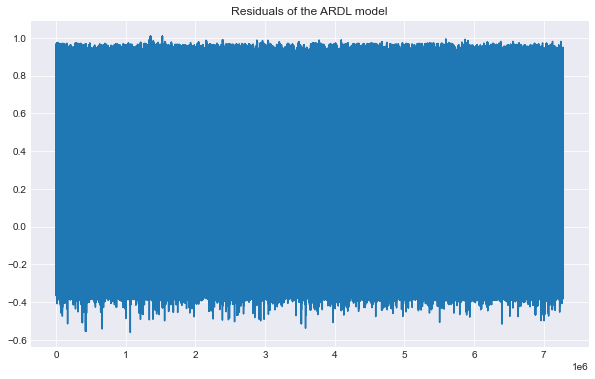

In [7]:
# visulize the results

# plot the residuals
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10, 6))
plt.plot(model_fit.resid)
plt.title('Residuals of the ARDL model')
plt.show()

/Users/rainylty/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


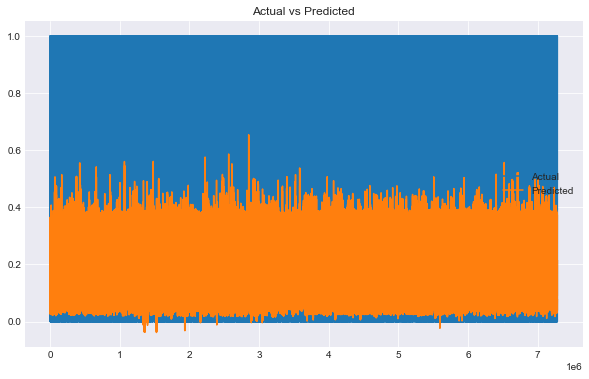

In [9]:
# plot ardl model results

plt.figure(figsize=(10, 6))

plt.plot(df_final_notna['pct_blackout'], label='Actual')
plt.plot(model_fit.fittedvalues, label='Predicted')

plt.title('Actual vs Predicted')
plt.legend()

plt.show()

# plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(model_fit.resid)
plt.title('Residuals of the ARDL model')
plt.show()



In [ ]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test

def adf_test(series, name):
    result = adfuller(series.dropna())  # Drop NA for the test
    print(f'ADF Statistic for {name}: {result[0]}')
    print(f'p-value for {name}: {result[1]}')


# Perform the test on each variable
adf_test(df_final['pct_blackout'], 'pct_blackout')
adf_test(df_final['t2m'], 't2m')
adf_test(df_final['wind'], 'wind')
adf_test(df_final['tp'], 'tp')

In [ ]:
# First, ensure your data contains the "climate_zone_code" column for each station
# Assuming 'climate_zone_code' is a column that indicates the climate zone for each station

# Group data by 'climate_zone_code' and aggregate by taking the mean (or sum, depending on what makes sense)
climate_groups = df.groupby(['climate_zone_code', 'datetime']).mean()

# Reset index for easy access
climate_groups = climate_groups.reset_index()